In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

### Problem 1

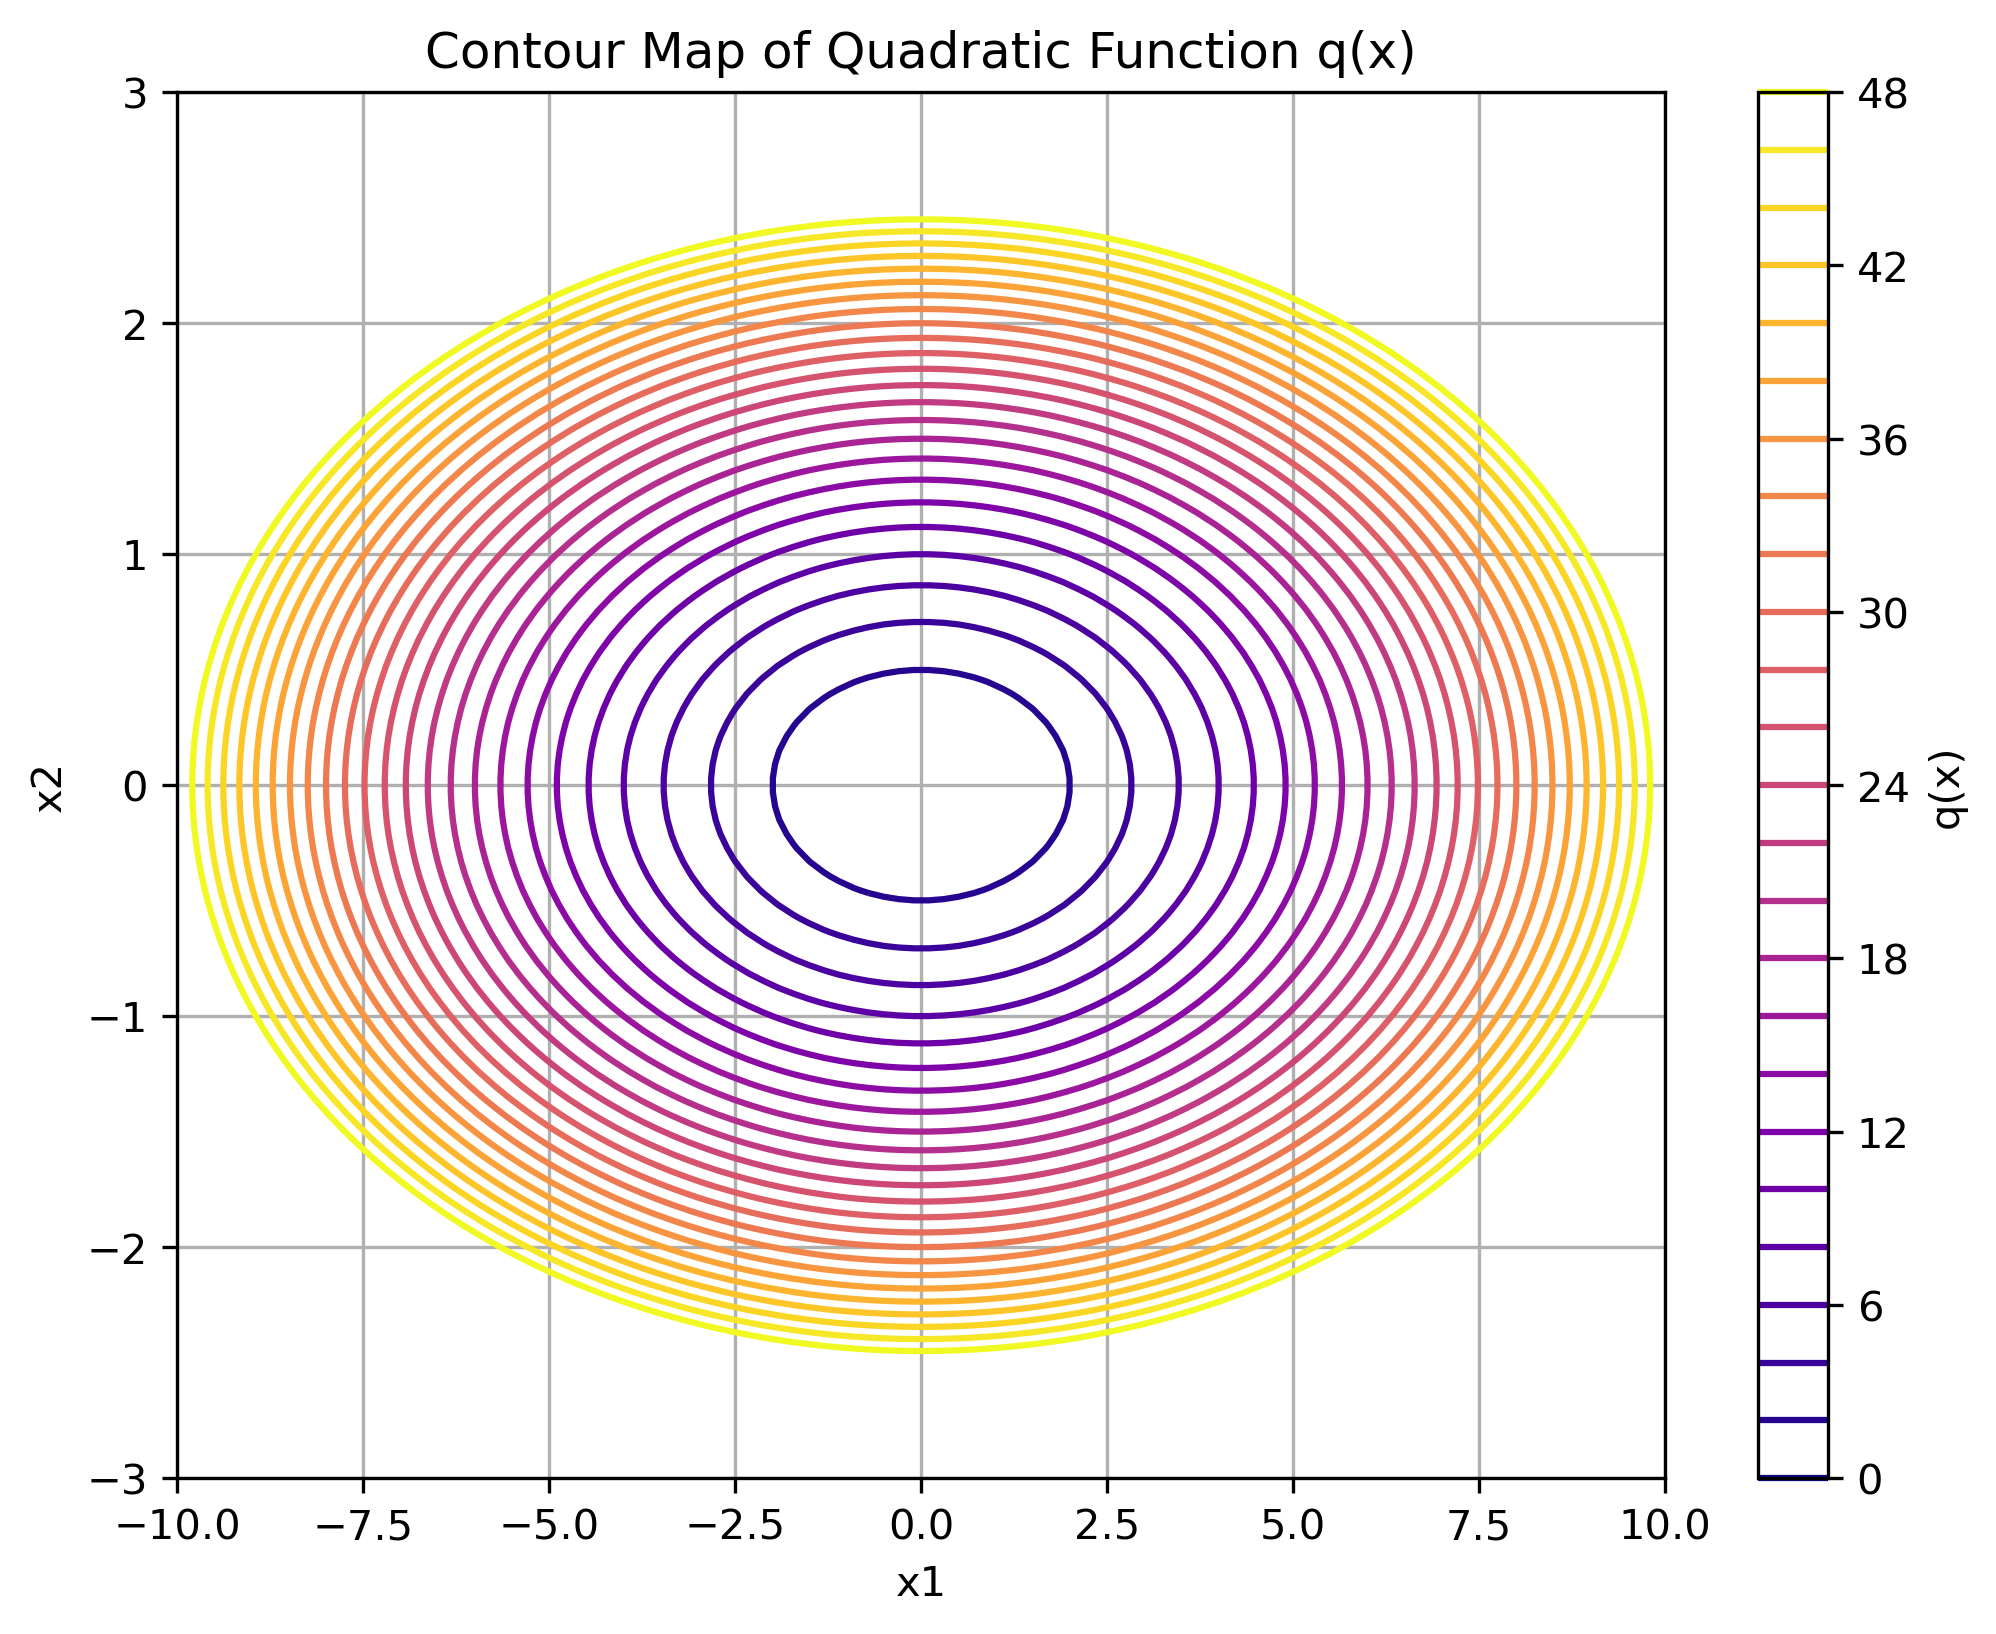

In [3]:
def quadratic_function(x):
    A = np.array([[1, 0], [0, 16]])
    return 0.5 * np.dot(np.dot(x.T, A), x)

x = np.linspace(-10, 10, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = quadratic_function(np.array([X[i, j], Y[i, j]]))

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=np.arange(0, 50, 2), cmap='plasma')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Map of Quadratic Function q(x)')
plt.grid(True)
plt.colorbar(label='q(x)')
plt.show()

### Problem 2

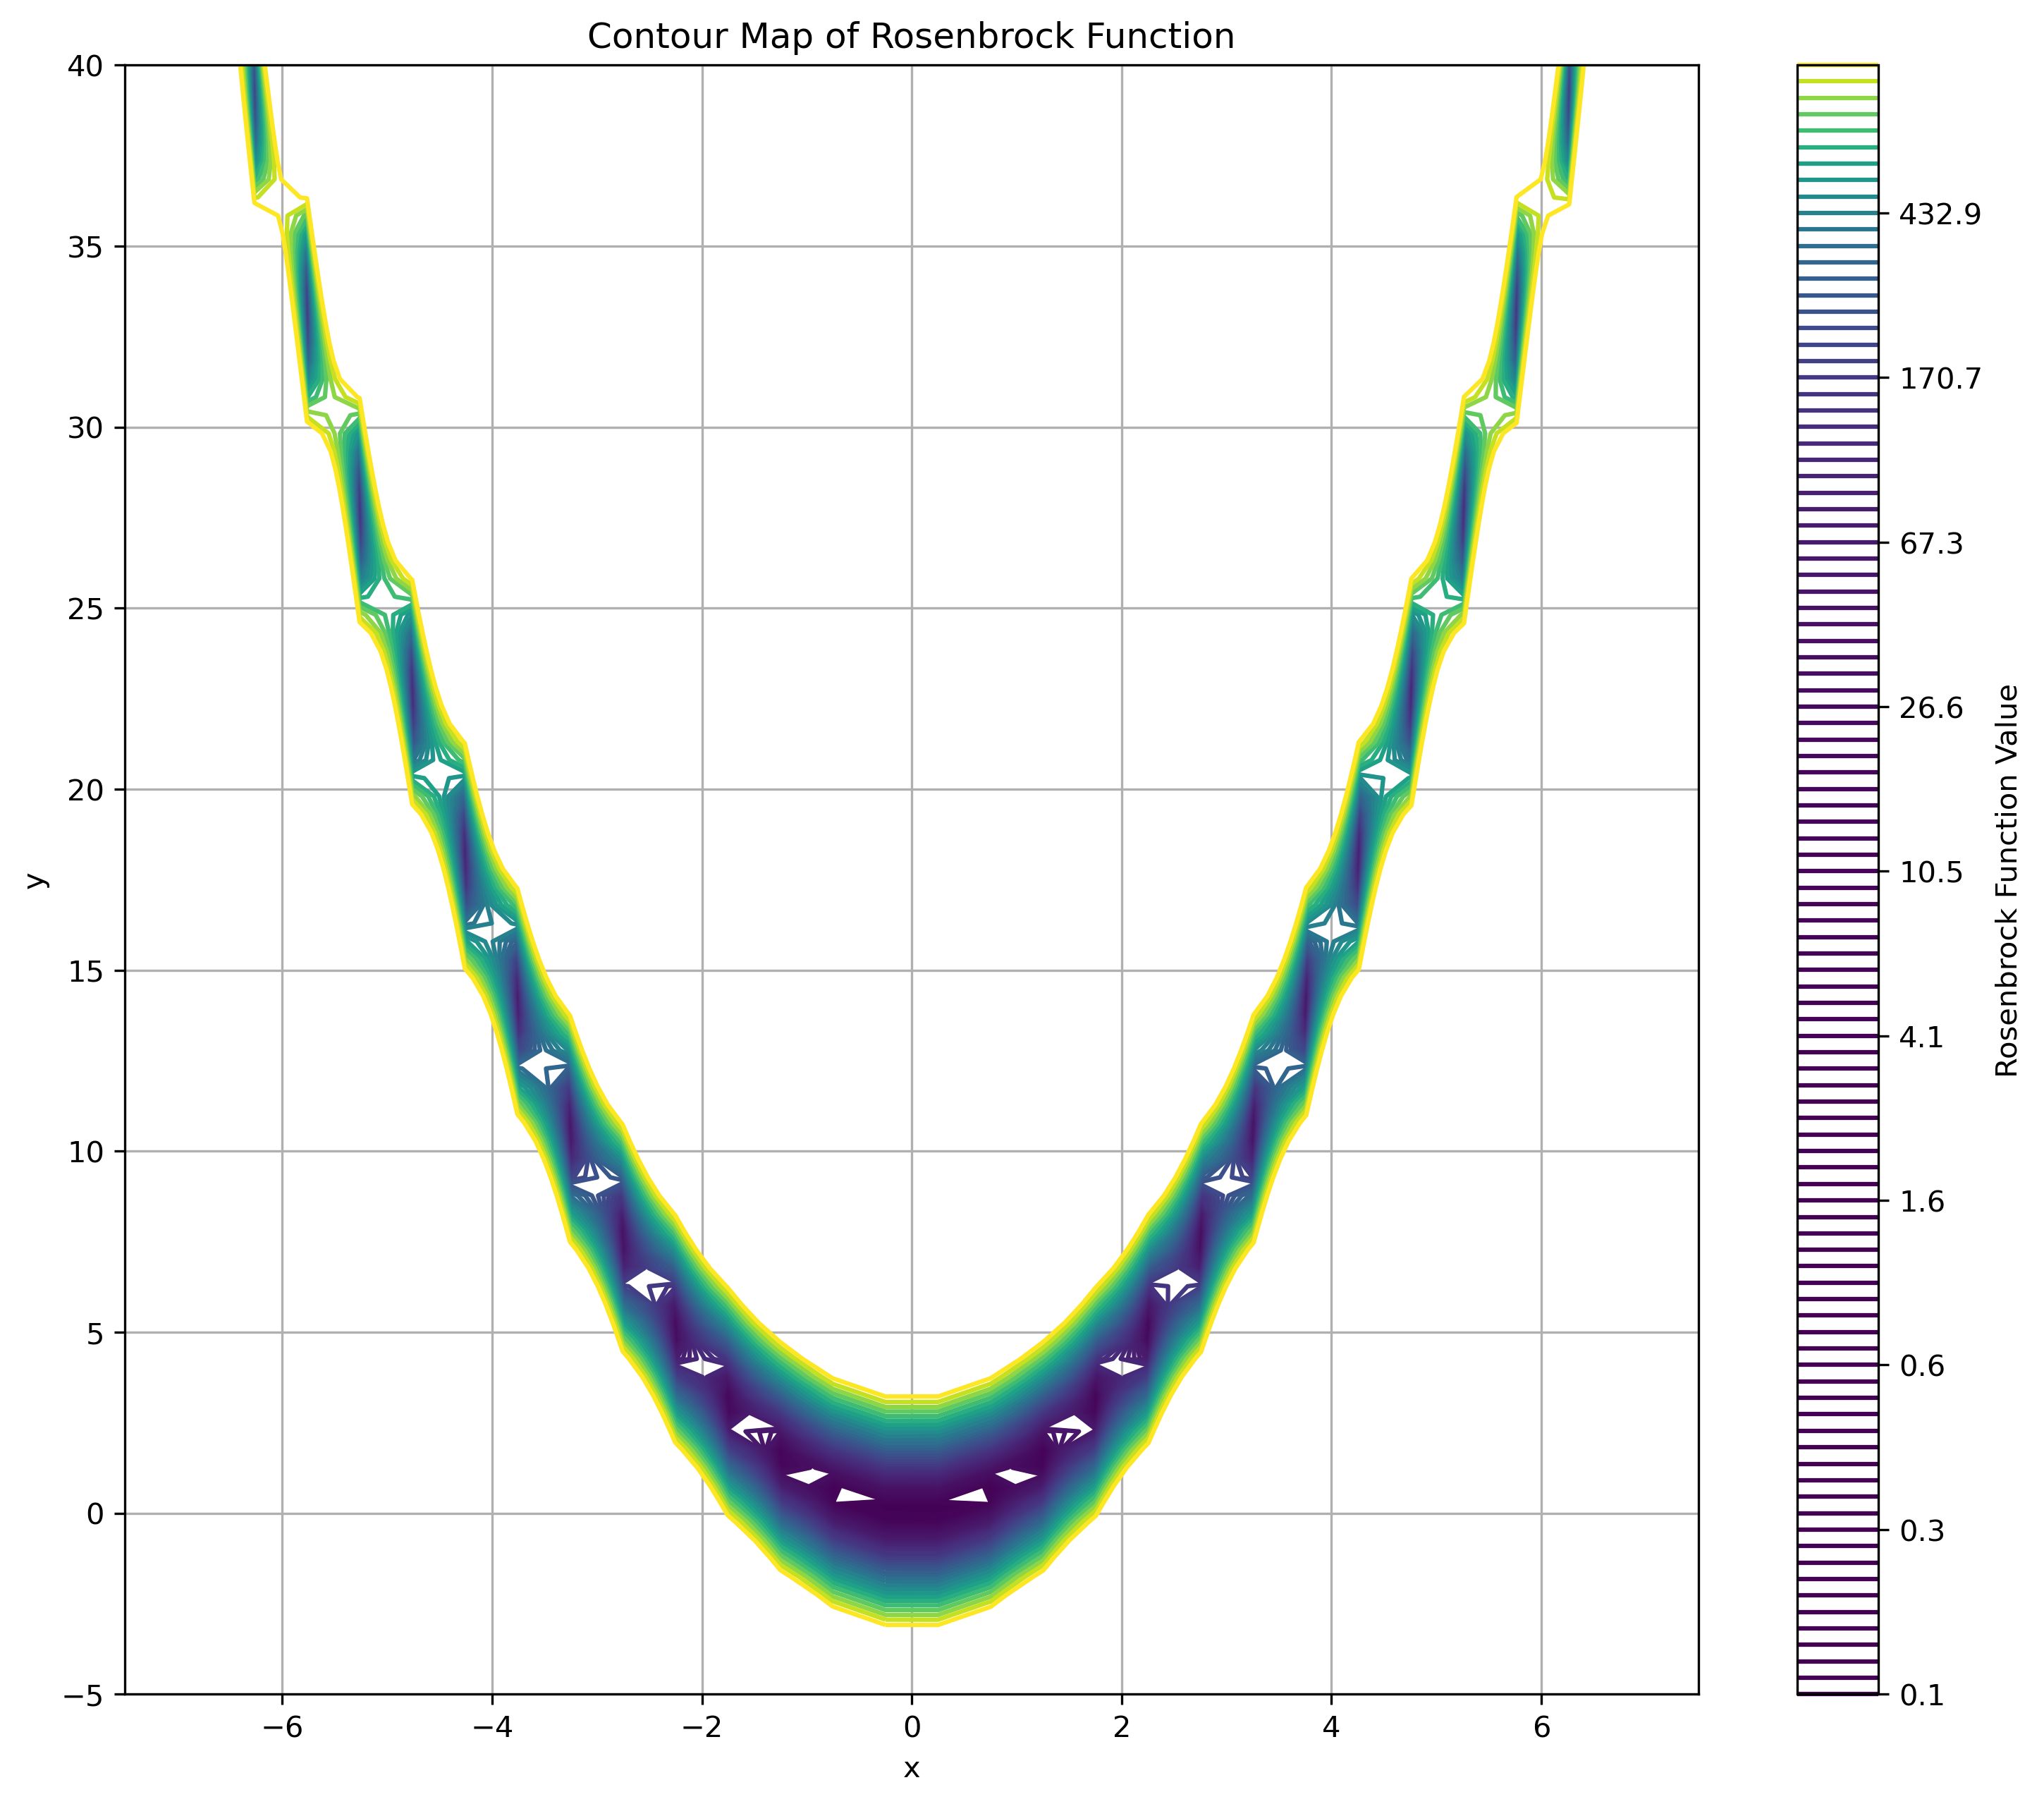

In [8]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(12, 10))
contours = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 100))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Map of Rosenbrock Function')
plt.colorbar(contours, label='Rosenbrock Function Value')
plt.grid(True)

plt.xlim(-7.5, 7.5)
plt.ylim(-5, 40)

plt.show()

### Problem 4

In [4]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_gradient(x, y):
    df_dx = 400 * x**3 - 400*x*y + 2*x - 2
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def steepest_descent_backtracking(initial_point, max_iter=20, alpha=0.5, beta=0.5):
    x_values = [initial_point[0]]
    y_values = [initial_point[1]]
    current_point = initial_point
    
    for i in range(max_iter):
        gradient = rosenbrock_gradient(*current_point)
        direction = -gradient
        step_size = 1
        
        while rosenbrock(*(current_point + step_size * direction)) > rosenbrock(*current_point) + alpha * step_size * np.dot(gradient, direction):
            step_size *= beta
        
        current_point = current_point + step_size * direction
        x_values.append(current_point[0])
        y_values.append(current_point[1])
    
    return x_values, y_values


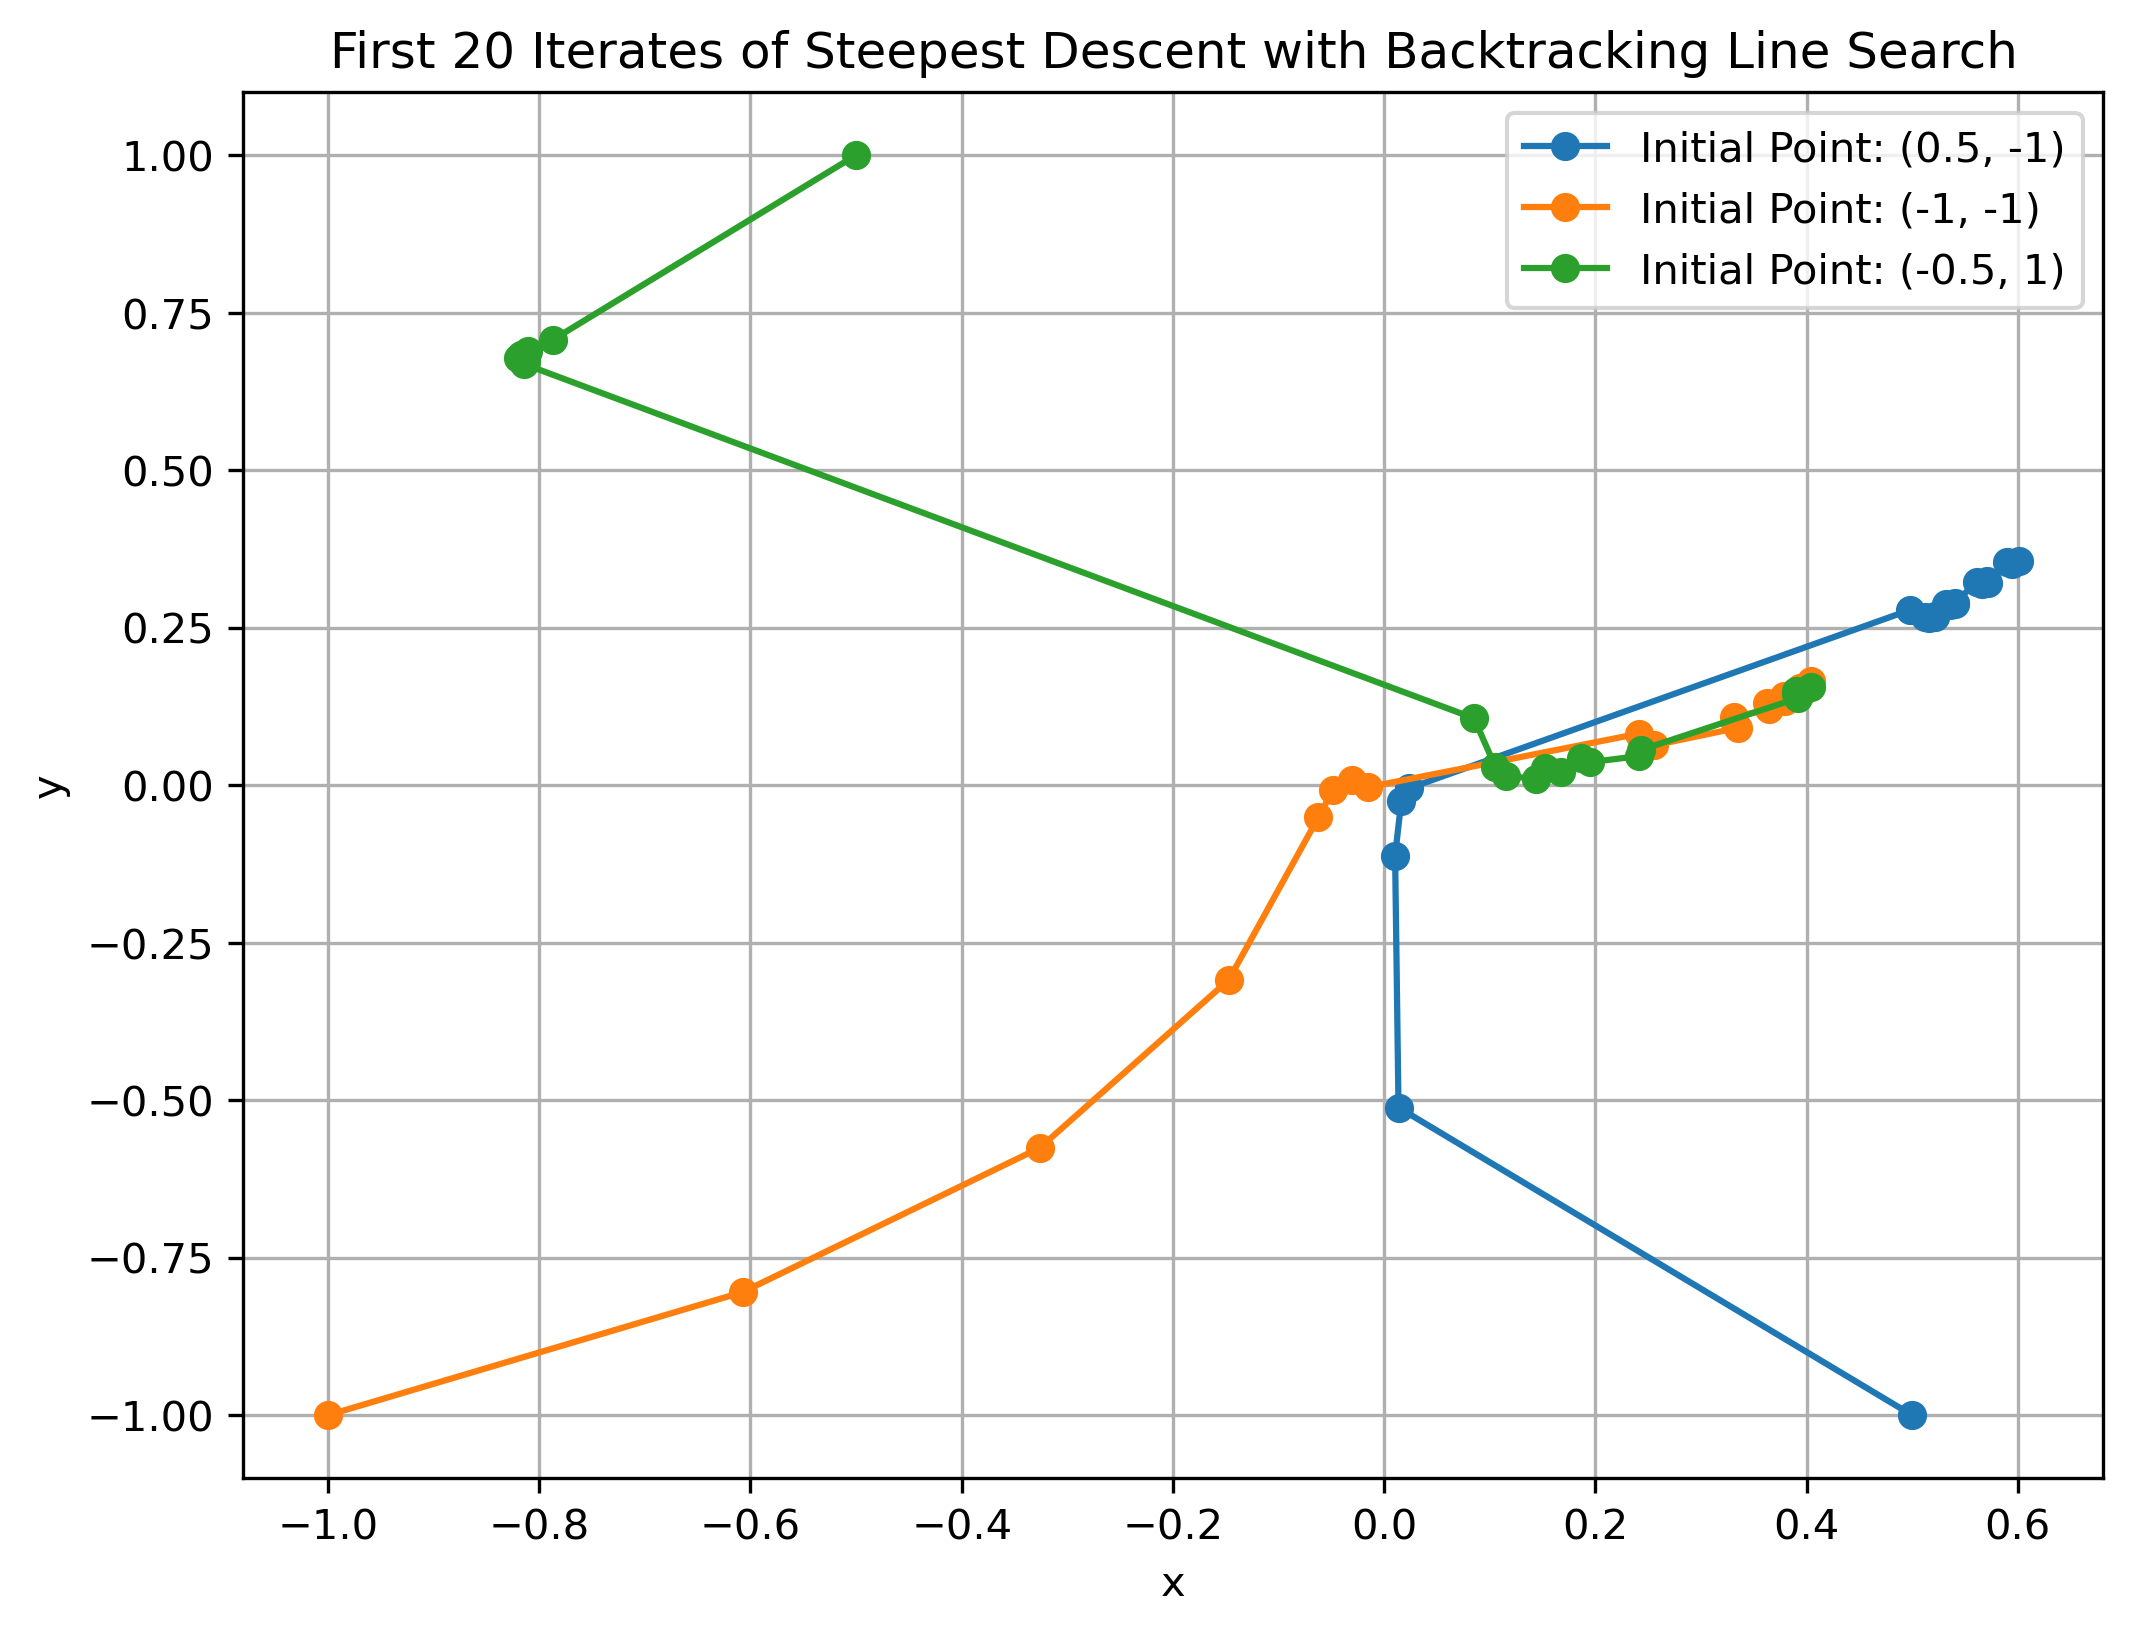

In [5]:
initial_points = [(0.5, -1), (-1, -1), (-0.5, 1)]

plt.figure(figsize=(8, 6))
for initial_point in initial_points:
    x_values, y_values = steepest_descent_backtracking(initial_point)
    plt.plot(x_values, y_values, marker='o', label=f'Initial Point: {initial_point}')
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('First 20 Iterates of Steepest Descent with Backtracking Line Search')
plt.legend()
plt.grid(True)
plt.show()

### Problem 6

In [6]:
def rosenbrock_hessian(x, y):
    d2f_dx2 = 2 - 400 * (y - 3 * x**2)
    d2f_dy2 = 200
    d2f_dxdy = -400 * x
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

def newton(initial_point, max_iter=10):
    x_values = [initial_point[0]]
    y_values = [initial_point[1]]
    current_point = initial_point
    
    for i in range(max_iter):
        gradient = rosenbrock_gradient(*current_point)
        hessian = rosenbrock_hessian(*current_point)
        direction = -np.linalg.solve(hessian, gradient)
        
        current_point = current_point + direction
        x_values.append(current_point[0])
        y_values.append(current_point[1])
    
    return x_values, y_values

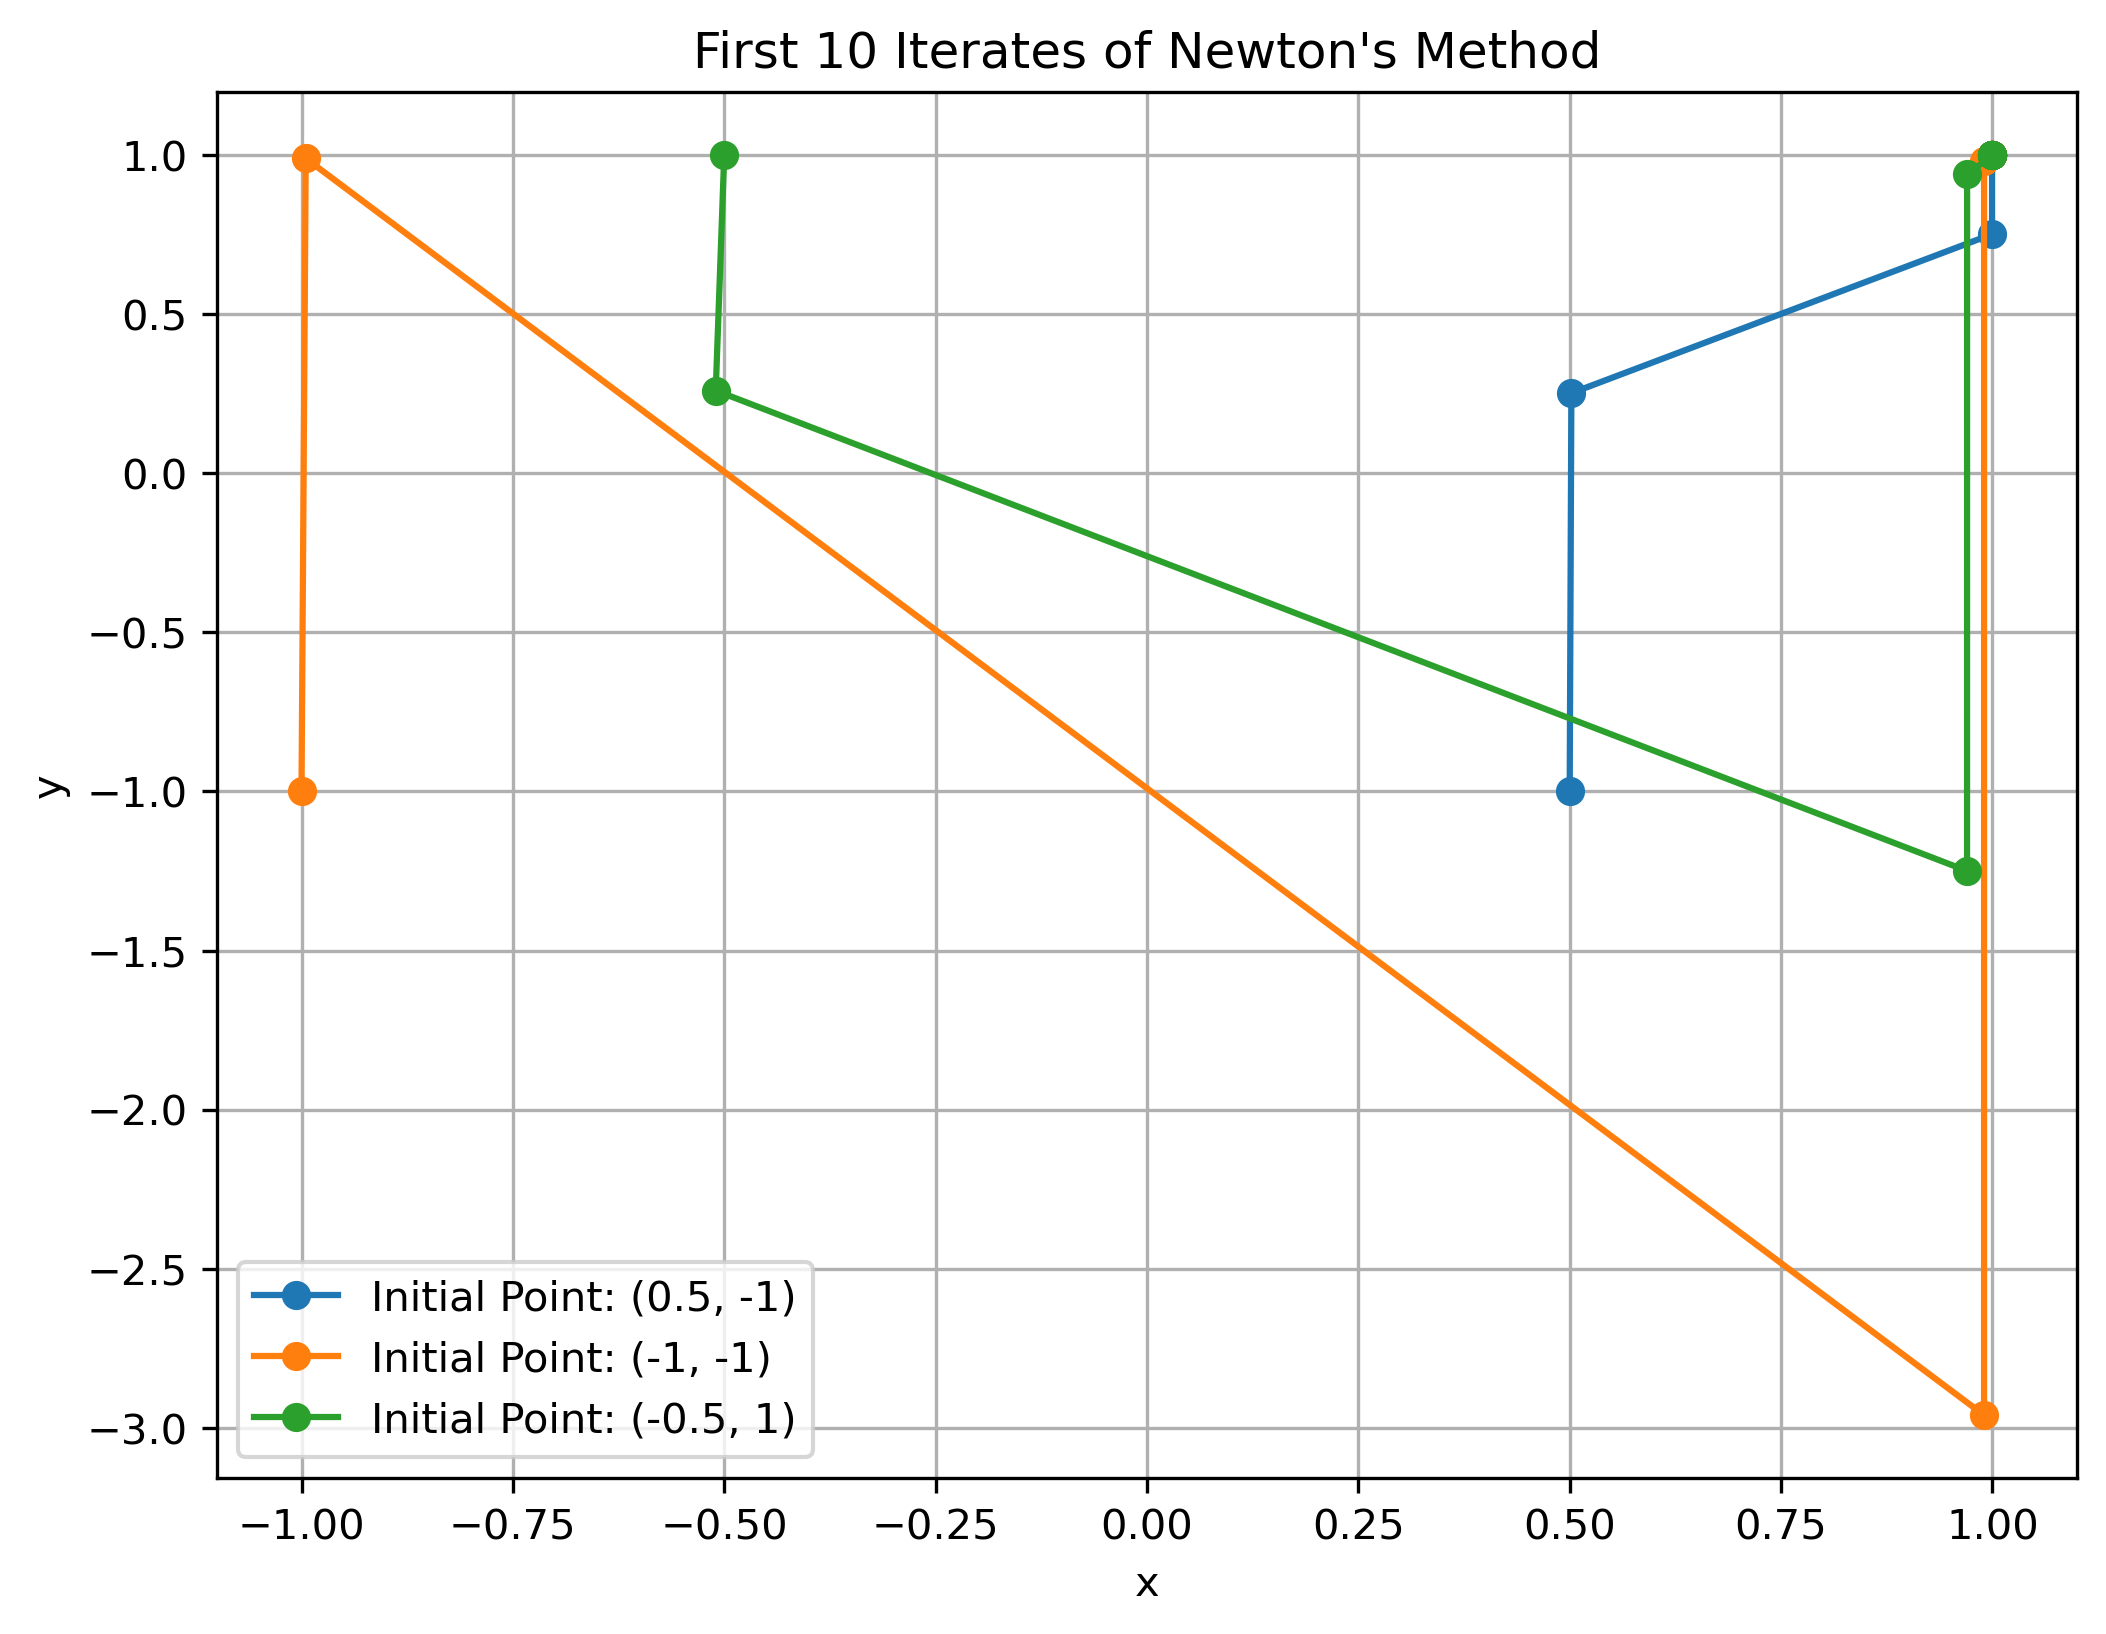

In [7]:
initial_points = [(0.5, -1), (-1, -1), (-0.5, 1)]

plt.figure(figsize=(8, 6))
for initial_point in initial_points:
    x_values, y_values = newton(initial_point)
    plt.plot(x_values, y_values, marker='o', label=f'Initial Point: {initial_point}')
    
plt.xlabel('x')
plt.ylabel('y')
plt.title("First 10 Iterates of Newton's Method")
plt.legend()
plt.grid(True)
plt.show()

### Problem 7

In [8]:
def fake_regression(N=10000, k=1, stiffness=1):
    np.random.seed(123)
    sigma = 1
    X = np.random.randn(N, k + 1)
    X[:, 0] = 1
    X[:, 1] = X[:, 1] * stiffness
    beta = np.array(range(1, k + 2))
    y = X @ beta + sigma * np.random.randn(N)
    return X, y

def SGD(X, y, beta_init, epsilon=0.02, max_iter=500):
    N, k = X.shape
    beta = beta_init
    mse_list = []
    beta_sequence = [beta_init]

    for _ in range(max_iter):
        idx = np.random.randint(N)
        xi = X[idx]
        yi = y[idx]
        gradient = 2 * xi * (xi @ beta - yi)
        beta = beta - epsilon * gradient
        mse = np.mean((X @ beta - y)**2)
        mse_list.append(mse)
        beta_sequence.append(beta)

    return beta, mse_list, beta_sequence

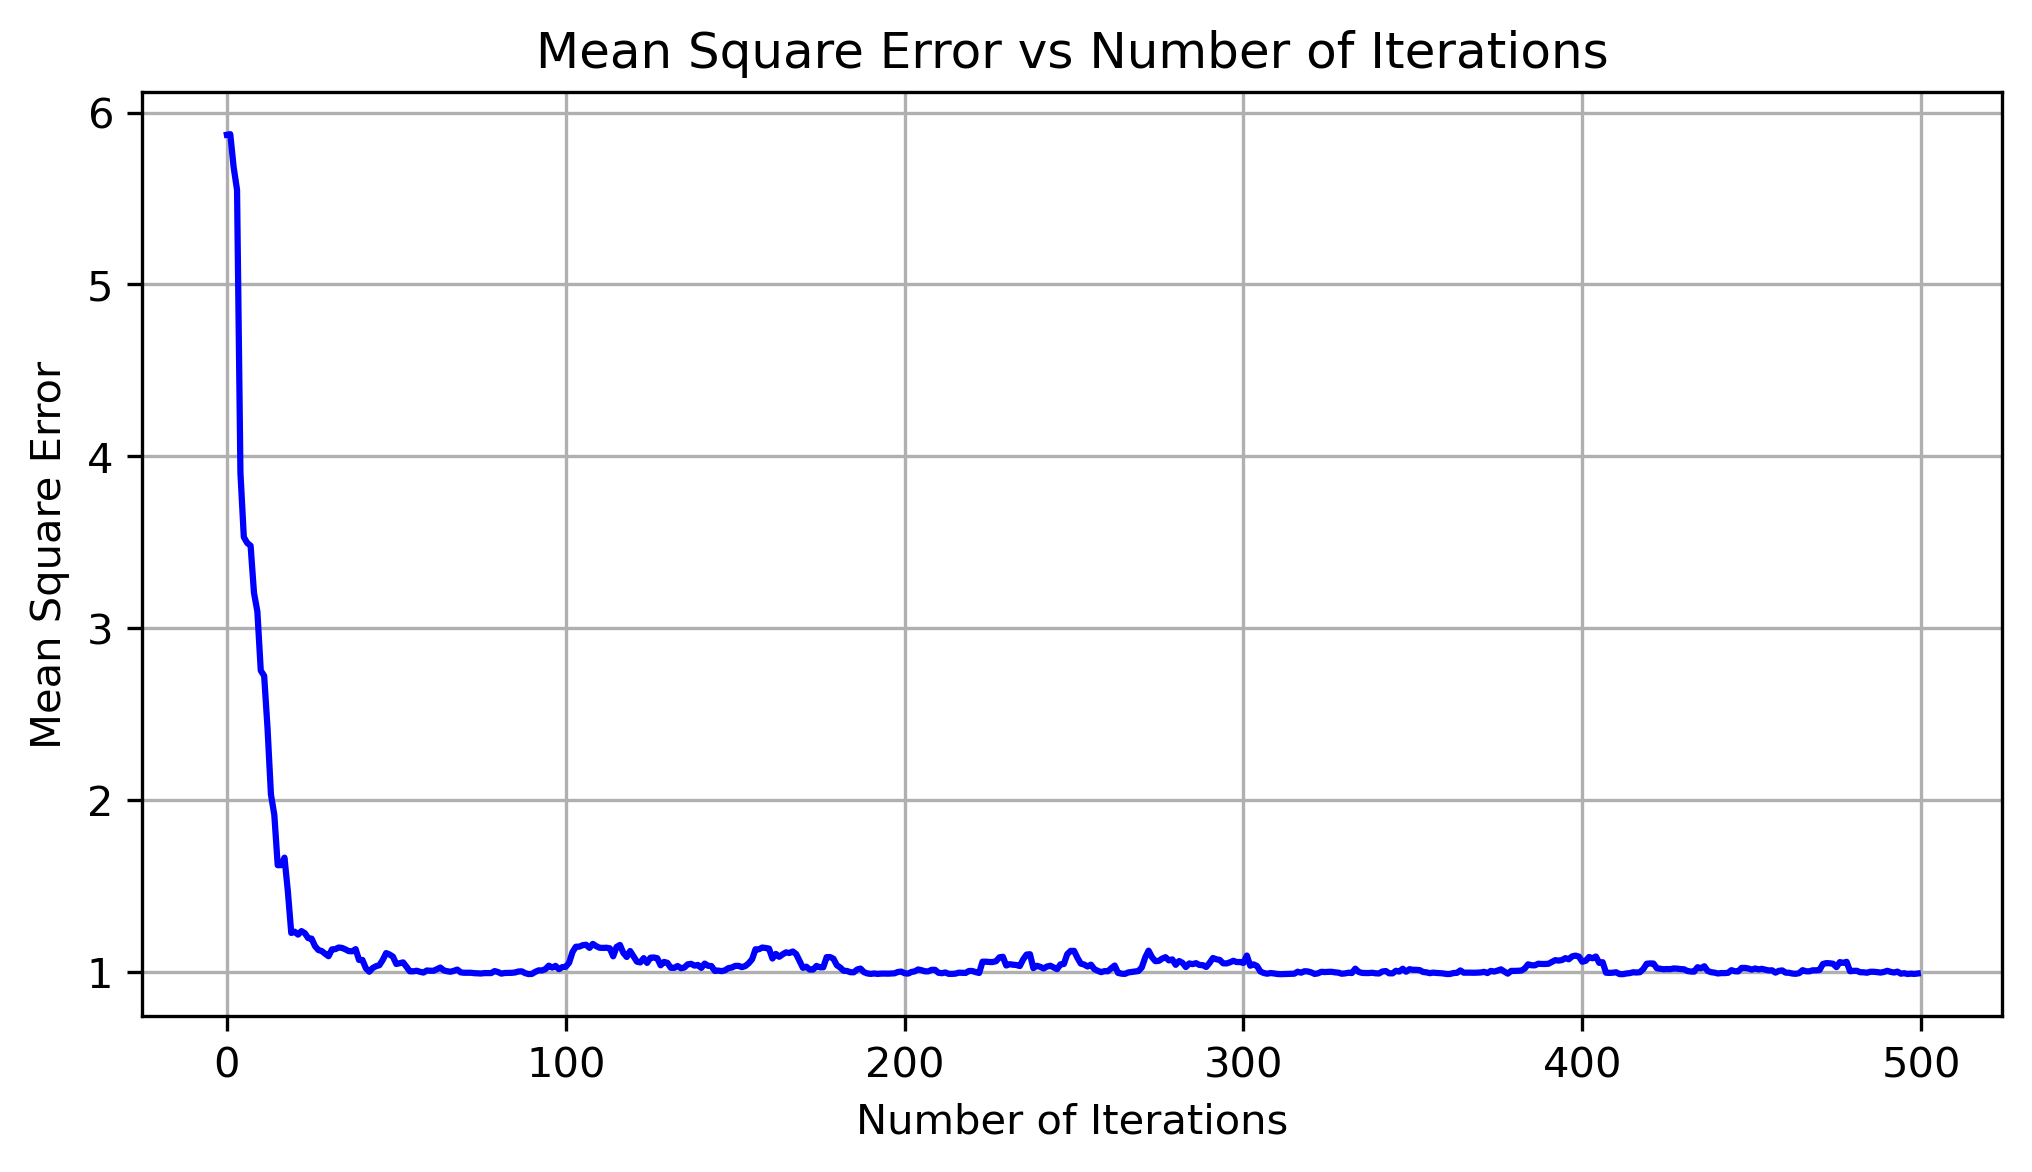

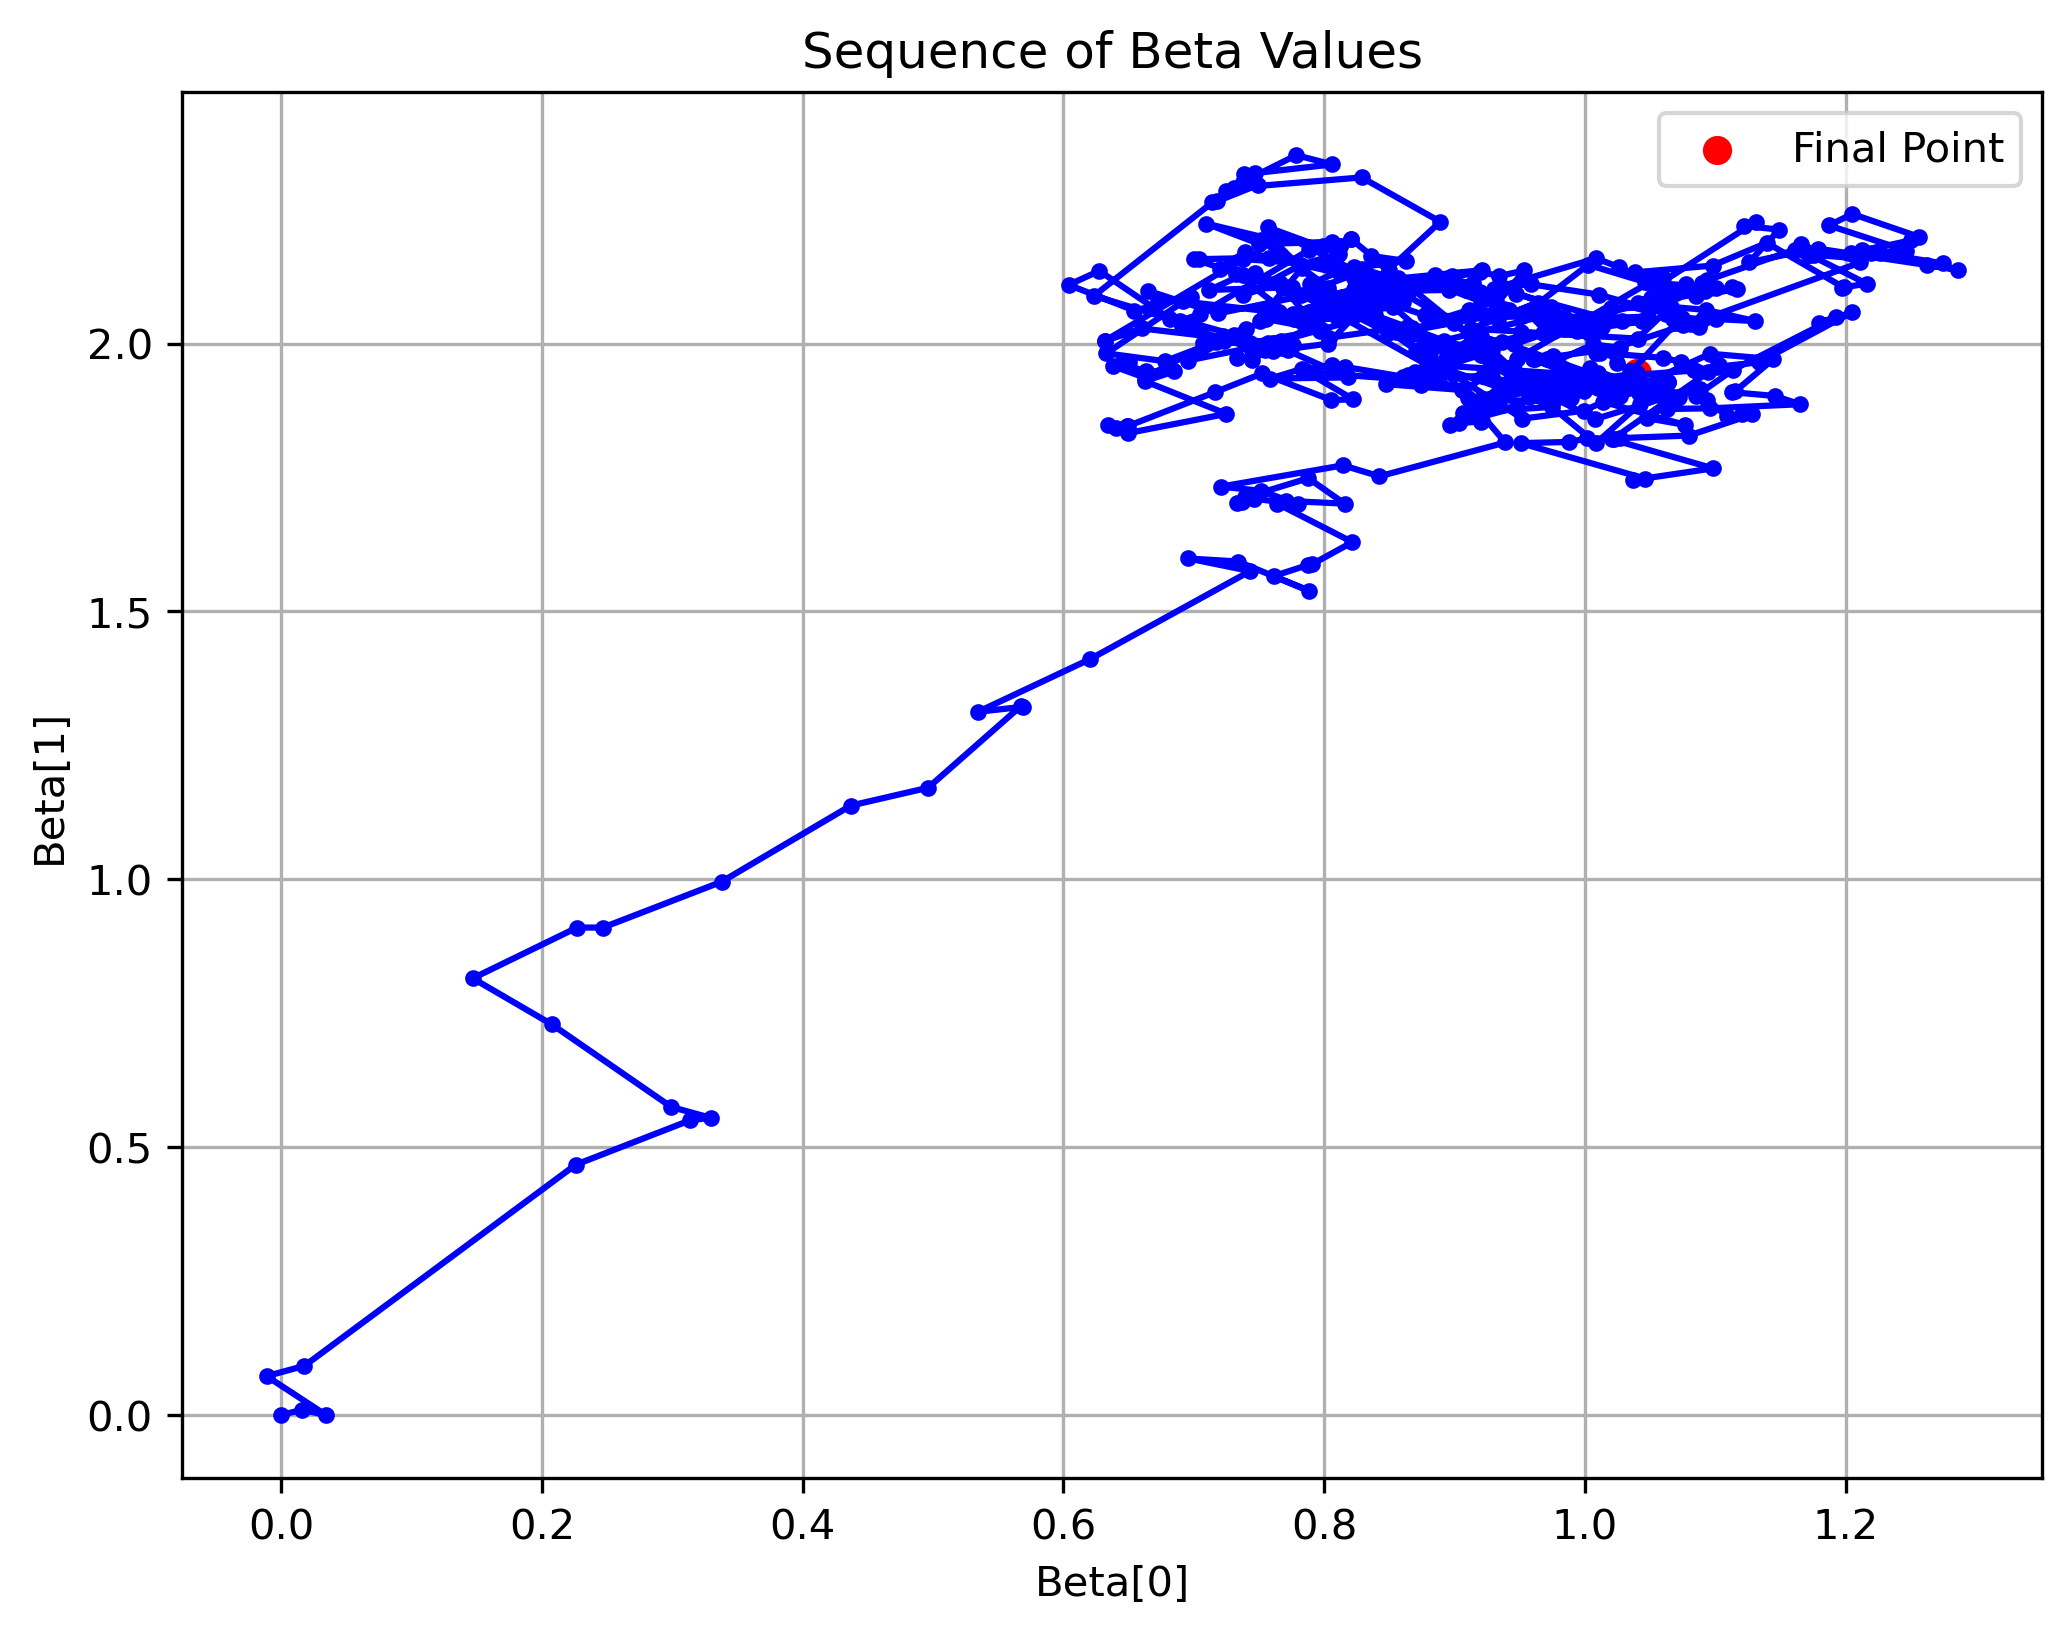

In [25]:
X, y = fake_regression(N=10000, k=1, stiffness=1)

beta_init = np.array([0, 0])

beta_final, mse_list, beta_sequence = SGD(X, y, beta_init, epsilon=0.02, max_iter=500)

plt.figure(figsize=(8, 4))
plt.plot(range(len(mse_list)), mse_list, c='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Number of Iterations')
plt.grid(True)
plt.show()

beta_sequence = np.array(beta_sequence)
plt.figure(figsize=(8, 6))
plt.scatter(beta_sequence[-1, 0], beta_sequence[-1, 1], c='r', label='Final Point')
plt.plot(beta_sequence[:, 0], beta_sequence[:, 1], c='b', marker='o', markersize=3)
plt.xlabel('Beta[0]')
plt.ylabel('Beta[1]')
plt.title('Sequence of Beta Values')
plt.grid(True)
plt.legend()
plt.show()